In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import math
import pickle
import shap

In [3]:
data=pd.read_csv(r'D:\Sureka\PGP_SSN\Python\project\fraud_data\financial_data.csv')

In [5]:
data.shape

(6362620, 11)

In [6]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
# check for all the columns present
column_names = np.array(data.columns)
print(column_names)

['step' 'type' 'amount' 'nameOrig' 'oldbalanceOrg' 'newbalanceOrig'
 'nameDest' 'oldbalanceDest' 'newbalanceDest' 'isFraud' 'isFlaggedFraud']


In [11]:
#checking missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [12]:
# Duplicated row
duplicated = data.duplicated().sum()
duplicated

0

In [79]:
data.isFraud.value_counts()

False    6354407
True        8213
Name: isFraud, dtype: int64

In [15]:
#Ignore the this
#Identify the categorical and numerical columns to check the data distribution
column_datatypes = data.dtypes
categorical_columns = list(column_datatypes[column_datatypes=="object"].index.values)
continuous_columns = list(column_datatypes[column_datatypes=="float64"].index.values)
print(continuous_columns)
print(categorical_columns)

['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
['type', 'nameOrig', 'nameDest']


In [16]:
def category_distribution(data,categorical_columns):
    categorical_column_distribution = list()
    for cat_column in categorical_columns:
        categorical_column_distribution.append(data[cat_column].value_counts())
    return(categorical_column_distribution)

In [17]:
categorical_column_distribution = category_distribution(data,categorical_columns)

In [18]:
print(categorical_column_distribution)

[CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64, C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64, C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64]


In [19]:
length_categorical_columns = list(map(lambda x:len(x),categorical_column_distribution))

In [20]:
print(length_categorical_columns)

[5, 6353307, 2722362]


In [23]:
#count the number of columns having the same number of unique values
distribution_dict = dict()
for val in length_categorical_columns:
    if val in distribution_dict.keys():
        count = distribution_dict[val]
        distribution_dict[val] = count+1
    else:
        distribution_dict[val]=1

print(distribution_dict)

{5: 1, 6353307: 1, 2722362: 1}


In [24]:
data[continuous_columns].describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


### EDA

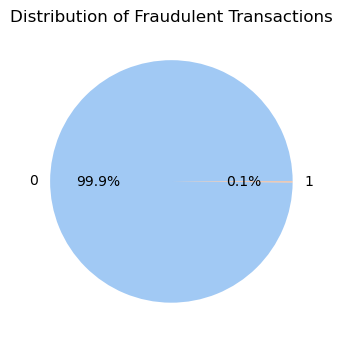

In [39]:
# Set the color palette
colors = sns.color_palette("pastel")

data['isFraud'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=0, colors=colors)
plt.ylabel('')  # This removes the 'isFraud' label on the y-axis
plt.title('Distribution of Fraudulent Transactions')
plt.show()


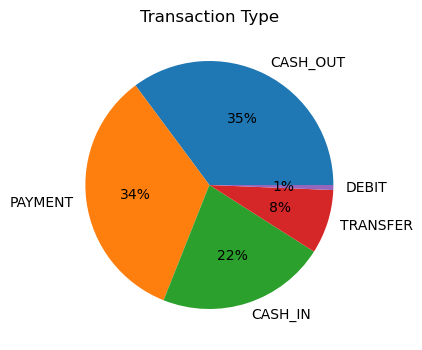

In [85]:
plt.figure(figsize=(4,5))
plt.pie(data.type.value_counts().values,labels=data.type.value_counts().index,  autopct='%.0f%%')
plt.title("Transaction Type")
plt.show()

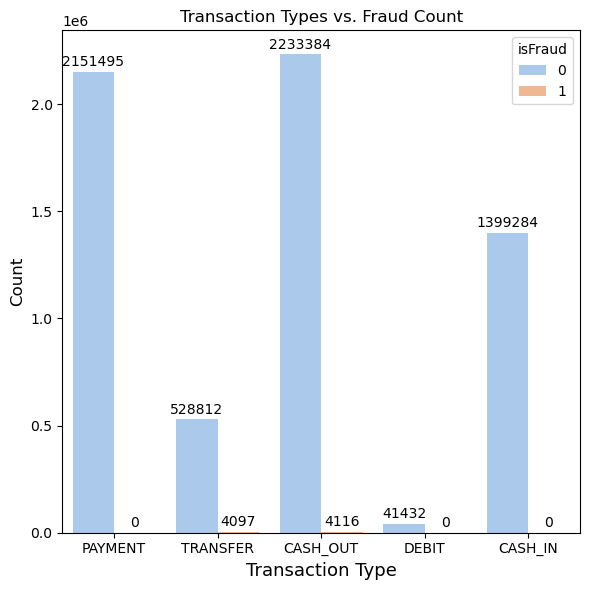

In [28]:
# Create the countplot
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='type', data=data, hue='isFraud', palette='pastel')

# Add a title and labels
plt.title('Transaction Types vs. Fraud Count', fontsize=12)
plt.xlabel('Transaction Type', fontsize=13)
plt.ylabel('Count', fontsize=12)

# Add count values above each bar
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):  # Check if the height is not NaN and greater than 0
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black',
                    xytext=(0, 7),  # adjust the vertical offset
                    textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.show()

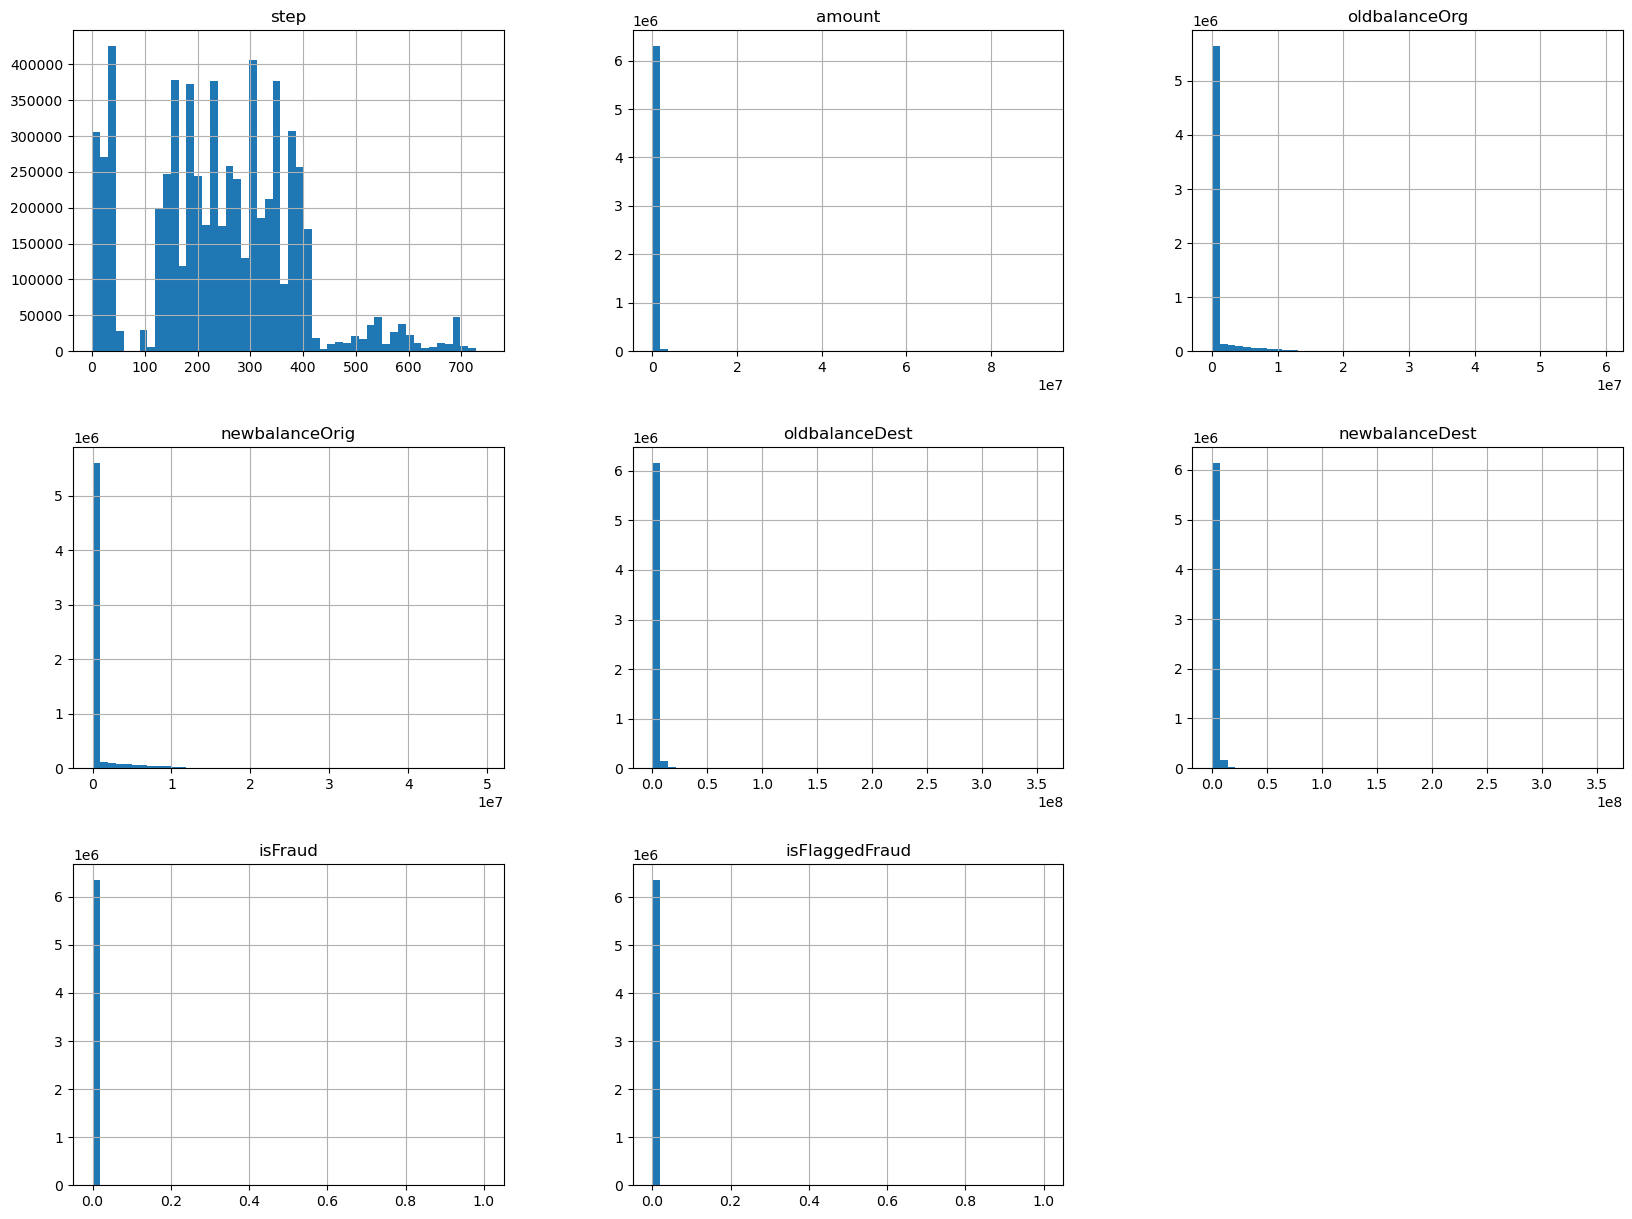

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

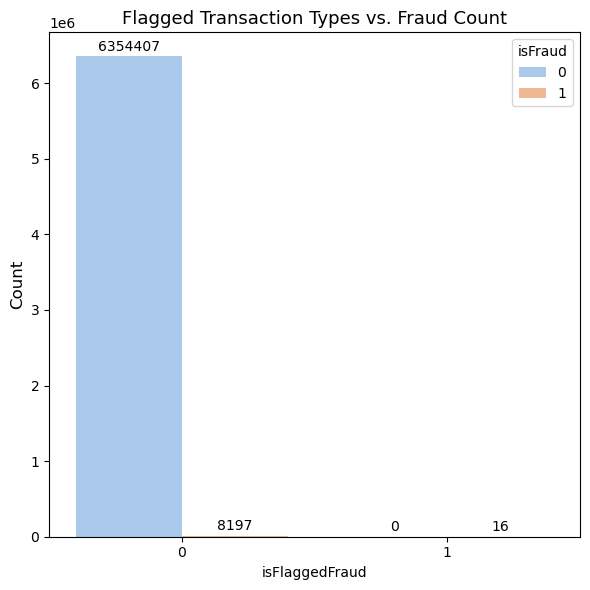

In [31]:
flagged_data = data.loc[data['isFlaggedFraud']==1]

# Create the countplot
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='isFlaggedFraud', data=data, hue='isFraud', palette='pastel')

# Add a title and labels
plt.title('Flagged Transaction Types vs. Fraud Count', fontsize=13)
plt.ylabel('Count', fontsize=12)

# Add count values above each bar
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):  # Check if the height is not NaN and greater than 0
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black',
                    xytext=(0, 7),  # adjust the vertical offset
                    textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.show()

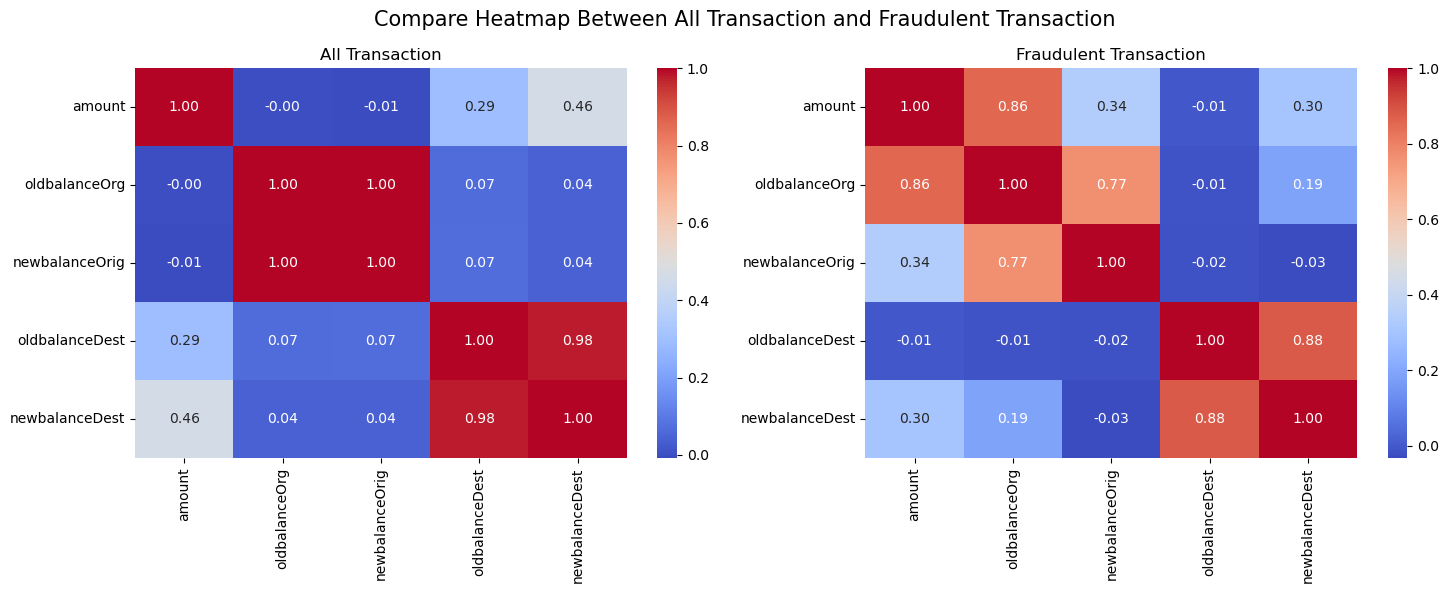

In [81]:
temp = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for 'data' dataframe
corr_matrix = temp.corr()

# Compute the correlation matrix for 'fraudulent_transaction' dataframe
fraudulent_transaction = temp.loc[data['isFraud']==1]
corr_fraudulent = fraudulent_transaction.corr()

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Heatmap for 'data' dataframe
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax[0])
ax[0].set_title("All Transaction", fontsize=12)

# Heatmap for 'fraudulent_transaction' dataframe
sns.heatmap(corr_fraudulent, annot=True, fmt=".2f", cmap='coolwarm', ax=ax[1])
ax[1].set_title("Fraudulent Transaction", fontsize=12)

fig.suptitle('Compare Heatmap Between All Transaction and Fraudulent Transaction', fontsize=15)

plt.tight_layout()
plt.show()


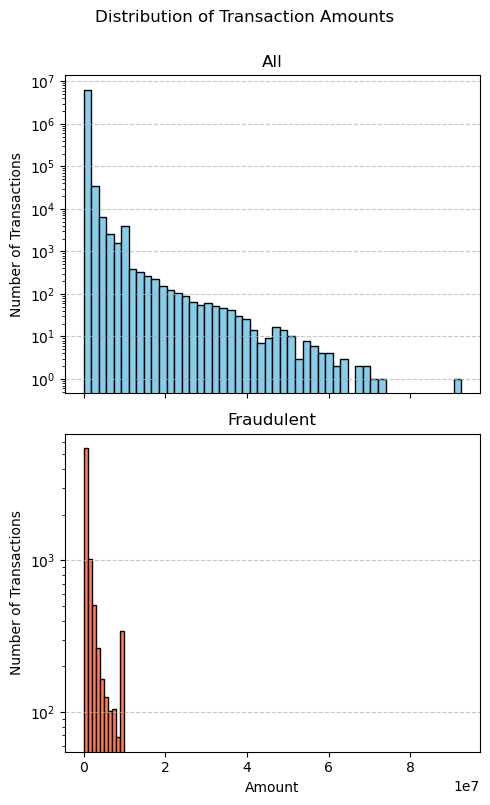

In [33]:
colors = sns.color_palette("pastel")

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 8), sharex=True)

# Distribution of Transaction Amounts for all transactions
axes[0].hist(data['amount'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('All')
axes[0].set_ylabel('Number of Transactions')
axes[0].set_yscale('log')  # Set y-axis to log scale
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Distribution of Transaction Amounts for fraudulent transactions
axes[1].hist(data.loc[data['isFraud']==1]['amount'], bins=10, color='coral', edgecolor='black')
axes[1].set_title('Fraudulent')
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('Number of Transactions')
axes[1].set_yscale('log')  # Set y-axis to log scale
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

fig.suptitle('Distribution of Transaction Amounts', y=1)
plt.tight_layout()
plt.show()



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



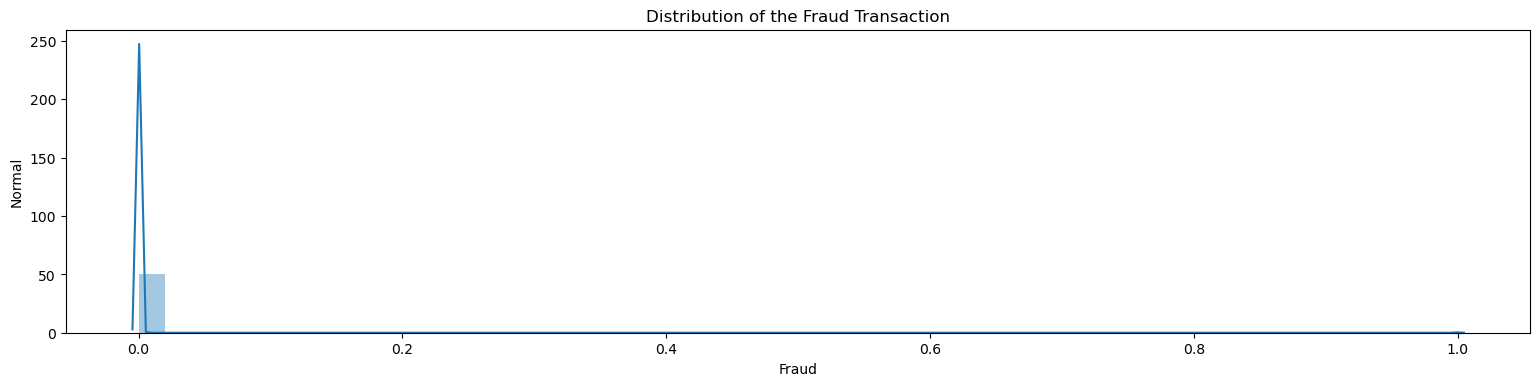

In [41]:
# Create a distplot
sns.distplot(data['isFraud'], kde=True, hist=True)
# Set labels and title
plt.xlabel('Fraud')
plt.ylabel('Normal')
plt.title('Distribution of the Fraud Transaction')

# Show the plot
plt.show()

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.


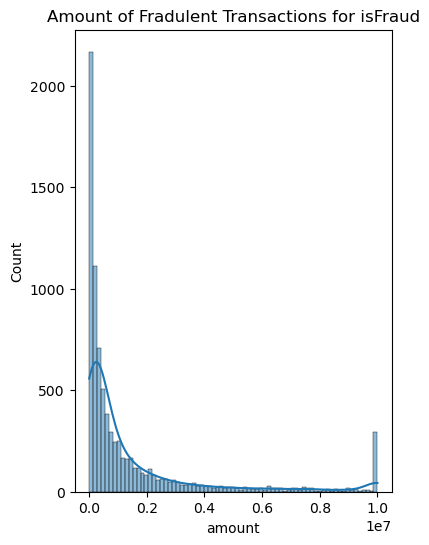

In [87]:
figure = plt.subplots(figsize = (9, 6))

plt.subplot(121)
ax = sns.histplot(data=data[data['isFraud']==1],x='amount', kde=True)
plt.title('Amount of Fradulent Transactions for isFraud')

plt.show()

### Data Preprocessing

In [44]:
# remove unuse columns
data.drop(['step', 'nameOrig', 'nameDest'], axis=1, inplace=True)

In [45]:
# covert data type of some columns
data['isFraud'] = data['isFraud'].astype(bool)
data['isFlaggedFraud'] = data['isFlaggedFraud'].astype(bool)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         bool   
 7   isFlaggedFraud  bool   
dtypes: bool(2), float64(5), object(1)
memory usage: 303.4+ MB


In [46]:
# encodeing categorical vaiables
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

# Reshape the 'type' column to 2D array for encoder
type_col = data['type'].values.reshape(-1, 1)

encoded_cols = encoder.fit_transform(type_col)

# Reset the index of the data dataframe
data = data.reset_index(drop=True)

# Create a DataFrame from the encoded columns
df_encoded = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['type']))

# Drop the original 'type' column and concatenate the encoded DataFrame
encoded_data = data.drop(columns=['type'])
encoded_data = pd.concat([encoded_data, df_encoded], axis=1)


encoded_data.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,False,False,0.0,0.0,0.0,1.0,0.0
1,1864.28,21249.0,19384.72,0.0,0.0,False,False,0.0,0.0,0.0,1.0,0.0
2,181.00,181.0,0.00,0.0,0.0,True,False,0.0,0.0,0.0,0.0,1.0
3,181.00,181.0,0.00,21182.0,0.0,True,False,0.0,1.0,0.0,0.0,0.0
4,11668.14,41554.0,29885.86,0.0,0.0,False,False,0.0,0.0,0.0,1.0,0.0


### Train and Split

In [48]:
# Split data into features and target
from sklearn.model_selection import train_test_split
X = encoded_data.drop(columns=['isFraud'])
y = encoded_data['isFraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [64]:
def run_model_and_evaluate(model, X_train, y_train, X_test, y_test):
    
    start_time = time.time()  # Start the timer

    # Train the model
    model.fit(X_train, y_train)

    # Predict on test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get the probability of the positive class
    
    # Stop the timer
    end_time = time.time()
    elapsed_time = end_time - start_time  # Calculate elapsed time in seconds

    # Evaluate classifier's performance
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)  # Use probabilities to compute ROC AUC
    
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    
    metrics_dict = {
        'running_time': elapsed_time,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    print(f"Running Time: {elapsed_time:.2f} seconds")
    print(f"Accuracy: {accuracy}")
    print(f"ROC AUC: {roc_auc}")
    print(classification_report(y_test, y_pred))

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)    

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    # Confusion matrix
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"], ax=axes[0])
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Confusion Matrix')

    # ROC curve
    axes[1].plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[1].plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
    axes[1].legend(loc='lower right')
    axes[1].grid(alpha=0.2)

    plt.tight_layout()
    plt.show()
    
    return metrics_dict

Running Time: 42.59 seconds
Accuracy: 0.9979481722938035
ROC AUC: 0.9642334286253939
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1270881
        True       0.36      0.79      0.50      1643

    accuracy                           1.00   1272524
   macro avg       0.68      0.89      0.75   1272524
weighted avg       1.00      1.00      1.00   1272524



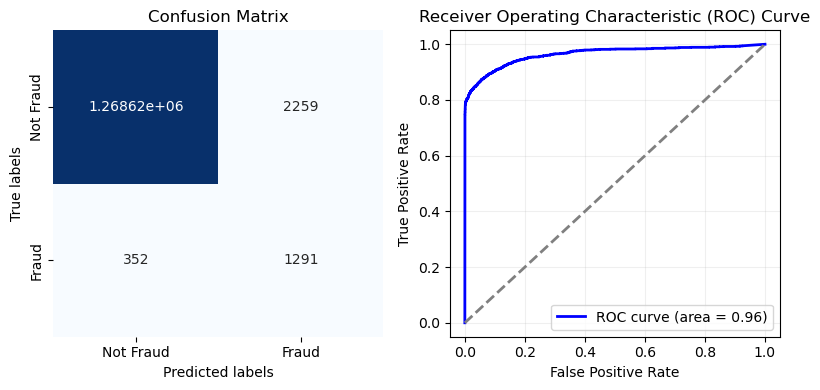

In [67]:
from sklearn.linear_model import LogisticRegression
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.metrics import roc_curve

lr = run_model_and_evaluate(LogisticRegression(), X_train, y_train, X_test, y_test)

Running Time: 246.52 seconds
Accuracy: 0.9996809490430043
ROC AUC: 0.97098428491875
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1270881
        True       0.96      0.79      0.86      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



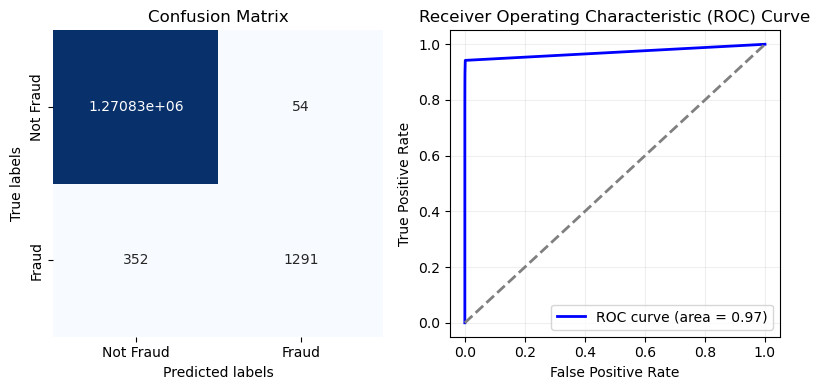

In [88]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_estimators=10)
rf = run_model_and_evaluate(model, X_train, y_train, X_test, y_test)

### SMOTE

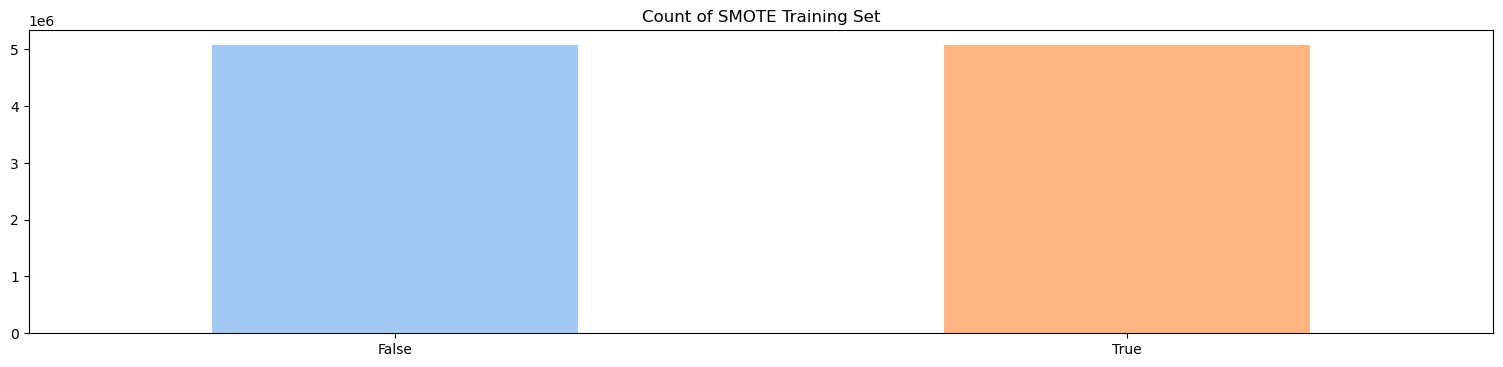

In [69]:
# Apply SMOTE to the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smoted, y_train_smoted = smote.fit_resample(X_train, y_train)

smote_df = pd.concat([X_train_smoted, y_train_smoted], axis=1).reset_index(drop=True)

# Checking the distribution of the target variable after SMOTE
smoted_distribution = y_train_smoted.value_counts()

smoted_distribution.plot(kind='bar', color=colors)
plt.title('Count of SMOTE Training Set')
plt.xticks(rotation=0)  # Rotate x-ticks by 90 degrees
plt.show()

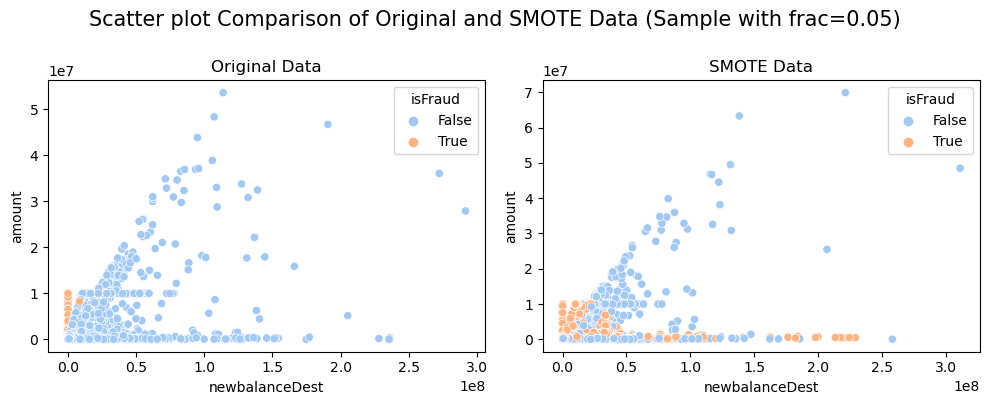

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

frac = 0.05 # Using a smaller fraction will reduce the execution time.

# First subplot
sns.scatterplot(x="newbalanceDest", y="amount", hue="isFraud", data=data.sample(frac=frac, random_state=42),palette="pastel", ax=axes[0])
axes[0].set_title("Original Data")

# Second subplot
sns.scatterplot(x="newbalanceDest", y="amount", hue="isFraud", data=smote_df.sample(frac=frac, random_state=42),palette="pastel", ax=axes[1])
axes[1].set_title("SMOTE Data")

# Main title
fig.suptitle('Scatter plot Comparison of Original and SMOTE Data (Sample with frac=0.05)', fontsize=15, y=1)
plt.tight_layout()
plt.show()

Running Time: 65.42 seconds
Accuracy: 0.6851069213625833
ROC AUC: 0.977473233671508
              precision    recall  f1-score   support

       False       1.00      0.68      0.81   1270881
        True       0.00      0.98      0.01      1643

    accuracy                           0.69   1272524
   macro avg       0.50      0.83      0.41   1272524
weighted avg       1.00      0.69      0.81   1272524



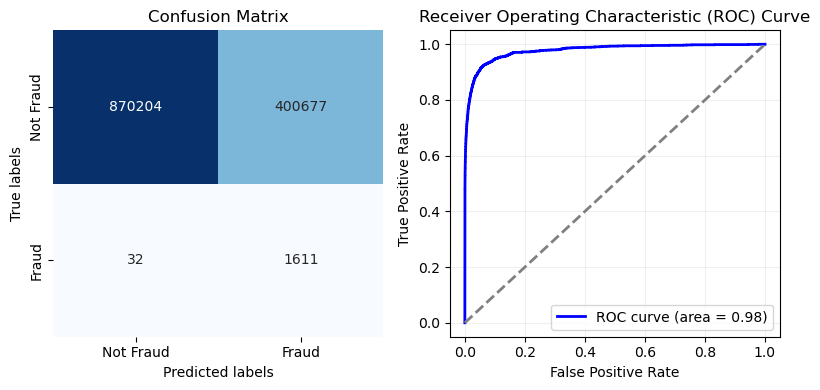

In [71]:
model = LogisticRegression(random_state=42, max_iter=100)
lr_smote = run_model_and_evaluate(model, X_train_smoted, y_train_smoted, X_test, y_test)

Running Time: 244.47 seconds
Accuracy: 0.9996809490430043
ROC AUC: 0.97098428491875
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1270881
        True       0.96      0.79      0.86      1643

    accuracy                           1.00   1272524
   macro avg       0.98      0.89      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



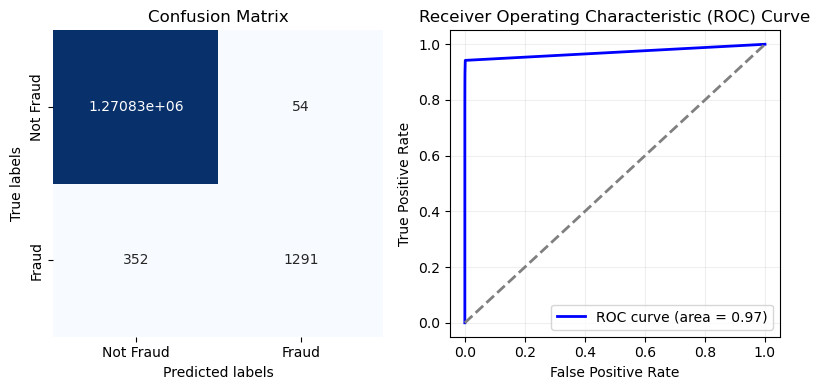

Running Time: 611.16 seconds
Accuracy: 0.9992675973105419
ROC AUC: 0.9971066194062245
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1270881
        True       0.65      0.96      0.77      1643

    accuracy                           1.00   1272524
   macro avg       0.82      0.98      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524



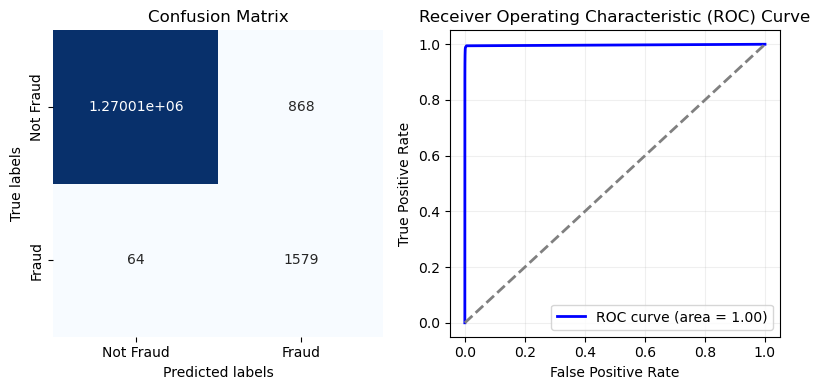

In [74]:
model = RandomForestClassifier(random_state=42, n_estimators=10)
rf_smote = run_model_and_evaluate(model, X_train_smoted, y_train_smoted, X_test, y_test)

In [75]:
result_df = pd.DataFrame([lr, lr_smote, rf, rf_smote], index=['LogisticRegression', 'LogisticRegression with SMOTE',
                                                              'RandomForest', 'RandomForest with SMOTE'])
result_df

,running_time,accuracy,roc_auc,precision,recall,f1_score
LogisticRegression,42.588039,0.997948,0.964233,0.363662,0.785758,0.497208
LogisticRegression with SMOTE,65.416802,0.685107,0.977473,0.004005,0.980523,0.007977
RandomForest,244.473350,0.999681,0.970984,0.959851,0.785758,0.864123
RandomForest with SMOTE,611.162541,0.999268,0.997107,0.645280,0.961047,0.772127


### Final Visualize

In [76]:
colors = sns.color_palette("pastel")

max_value = result_df['running_time'].max()
temp = result_df.copy()
temp['normalize_running_time'] = temp['running_time'] / max_value
temp.drop('running_time', inplace=True, axis=1)
temp = temp.T

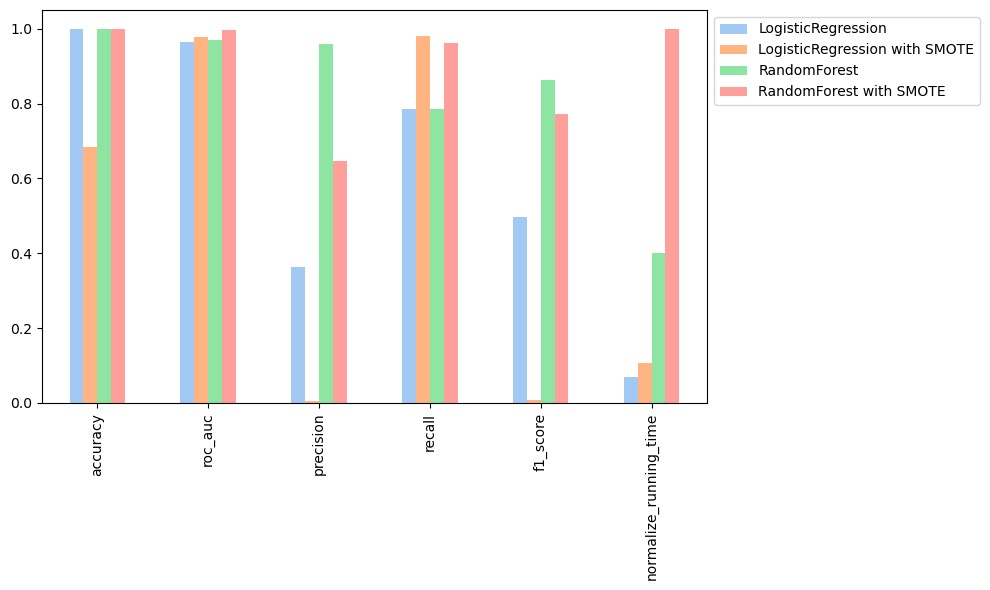

In [77]:
ax = temp.plot(kind='bar', figsize=(10, 6), color=colors)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place the legend outside of the plot
plt.tight_layout()
plt.show()

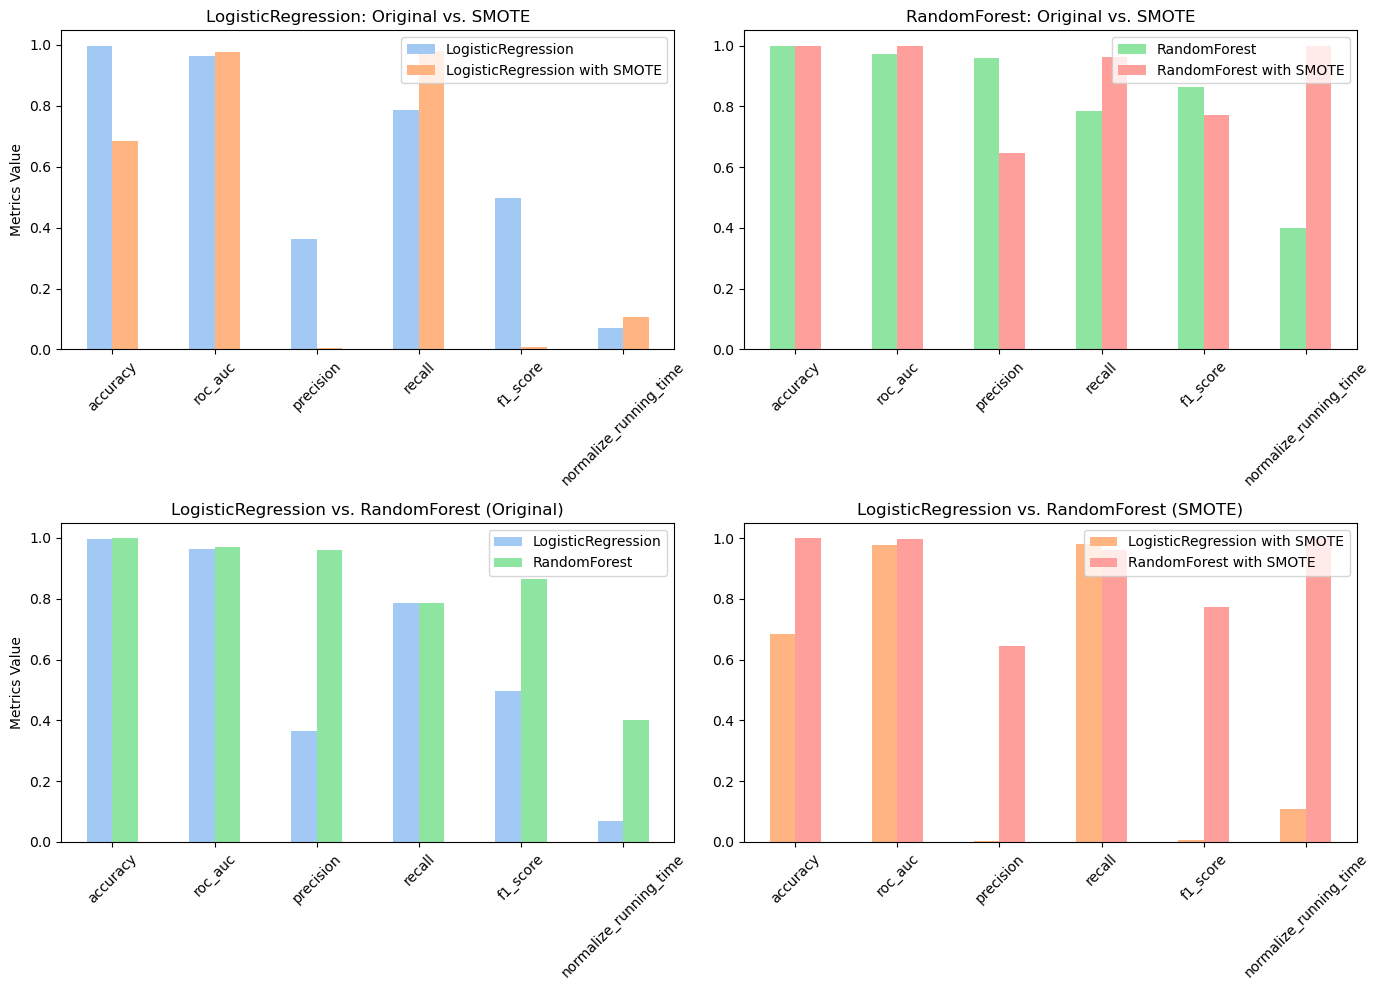

In [78]:
# create color dictionary for the plot
c = {
    'lr':'#a1c9f4',
    'lr_smote':'#ffb482',
    'rf':'#8de5a1',
    'rf_smote':'#ff9f9b',
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Comparing LogisticRegression model between normal and smote
temp[['LogisticRegression', 'LogisticRegression with SMOTE']].plot(kind='bar', color=[c['lr'], c['lr_smote']], ax=axes[0, 0])
axes[0, 0].set_title("LogisticRegression: Original vs. SMOTE")
axes[0, 0].set_ylabel("Metrics Value")
axes[0, 0].set_xticklabels(temp.index, rotation=45)

# 2. Compare RandomForest model between normal and smote 
temp[['RandomForest', 'RandomForest with SMOTE']].plot(kind='bar', color=[c['rf'], c['rf_smote']], ax=axes[0, 1])
axes[0, 1].set_title("RandomForest: Original vs. SMOTE")
axes[0, 1].set_xticklabels(temp.index, rotation=45)

# 3. Compare LogisticRegression model and RandomForest model normal
temp[['LogisticRegression', 'RandomForest']].plot(kind='bar', color=[c['lr'], c['rf']], ax=axes[1, 0])
axes[1, 0].set_title("LogisticRegression vs. RandomForest (Original)")
axes[1, 0].set_ylabel("Metrics Value")
axes[1, 0].set_xticklabels(temp.index, rotation=45)

# 4. compare LogisticRegression model and RandomForst model with smote
temp[['LogisticRegression with SMOTE', 'RandomForest with SMOTE']].plot(kind='bar', color=[c['lr_smote'], c['rf_smote']], ax=axes[1, 1])
axes[1, 1].set_title("LogisticRegression vs. RandomForest (SMOTE)")
axes[1, 1].set_xticklabels(temp.index, rotation=45)

plt.tight_layout()
plt.show()


Running Time: 716.34 seconds
Accuracy: 0.9994381245461775
ROC AUC: 0.9079431950197896
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1270881
        True       0.81      0.74      0.77      1643

    accuracy                           1.00   1272524
   macro avg       0.91      0.87      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524



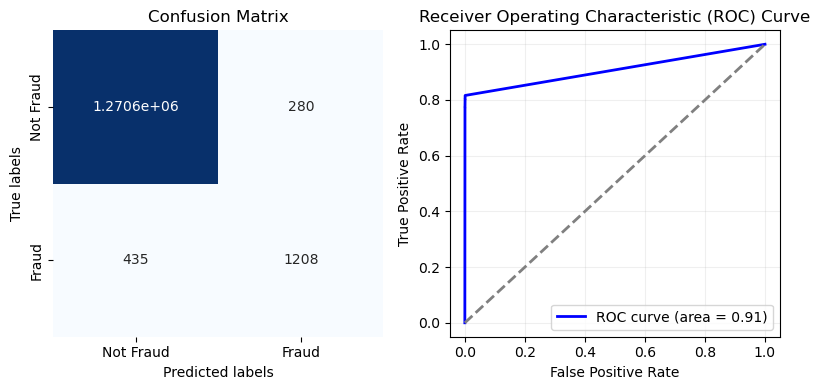

In [95]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto',metric='euclidean')
knn_classifier = run_model_and_evaluate(model,X_train,y_train,X_test,y_test)

In [93]:
#delhi,bangalore,hyderabad,indore,katmandu,bopal 18-42c

Running Time: 456.11 seconds
Accuracy: 0.9964204997312428
ROC AUC: 0.9576179491127544
              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1270881
        True       0.25      0.91      0.40      1643

    accuracy                           1.00   1272524
   macro avg       0.63      0.95      0.70   1272524
weighted avg       1.00      1.00      1.00   1272524



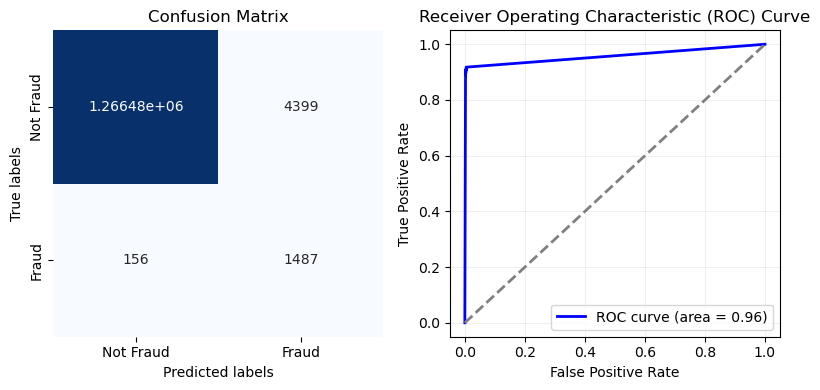

In [94]:
model=KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto',metric='euclidean')
knn_classifier = run_model_and_evaluate(model,X_train_smoted,y_train_smoted,X_test,y_test)

In [97]:
!pip install sweetviz

     ---------------------------------------- 15.1/15.1 MB 7.8 MB/s eta 0:00:00


In [98]:
import sweetviz as sv

my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
